In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# energygenerationdata = pd.read_csv("data/time_series_60min_singleindex.csv",
#                         usecols=(lambda s: s.startswith('utc') | 
#                                  s.startswith('DE_solar') |
#                                  s. startswith('DE_wind')),
#                         parse_dates=[0], index_col=0)

windgenerationdata = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('DE_wind_generation')),
                        parse_dates=[0], index_col=0)

solargenerationdata = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s.startswith('DE_solar')),
                        parse_dates=[0], index_col=0)

In [3]:
# weatherdata = pd.read_csv("data/weather_data.csv",
#                 usecols=(lambda s: s.startswith('utc') | 
#                          s.startswith('DE')),
#                 parse_dates=[0], index_col=0)

In [3]:
windspeed = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('DE_windspeed')),
                parse_dates=[0], index_col=0)

In [4]:
windspeed

,DE_windspeed_10m
utc_timestamp,
1980-01-01 00:00:00,5.7291
1980-01-01 01:00:00,5.7234
1980-01-01 02:00:00,5.7342
1980-01-01 03:00:00,5.7345
1980-01-01 04:00:00,5.6416
1980-01-01 05:00:00,5.6070
1980-01-01 06:00:00,5.5772
1980-01-01 07:00:00,5.3745
1980-01-01 08:00:00,5.4239


In [5]:
#creating training data but cutting the data based on time stamp
start_remove = pd.to_datetime('2016-01-01')
end_remove = pd.to_datetime('2017-01-01')
windspeedformatted = windspeed.loc[(windspeed.index >= start_remove)]
windgenerationdataformatted = windgenerationdata.loc[(windgenerationdata.index >= start_remove) & (windgenerationdata.index < end_remove)]

In [6]:
#creating test/comparison data
start_test = pd.to_datetime('2015-01-01')
end_test = pd.to_datetime('2016-01-01')
windspeedtest = windspeed.loc[(windspeed.index >= start_test) & (windspeed.index < end_test)]
windgenerationtest = windgenerationdata.loc[(windgenerationdata.index >= start_test) & (windgenerationdata.index < end_test)]

In [7]:
windspeedformatted

,DE_windspeed_10m
utc_timestamp,
2016-01-01 00:00:00,3.3849
2016-01-01 01:00:00,3.3636
2016-01-01 02:00:00,3.3268
2016-01-01 03:00:00,3.2796
2016-01-01 04:00:00,3.1705
2016-01-01 05:00:00,3.0251
2016-01-01 06:00:00,2.8701
2016-01-01 07:00:00,2.6828
2016-01-01 08:00:00,2.6454


In [8]:
windgenerationdataformatted

,DE_wind_generation_actual
utc_timestamp,
2016-01-01 00:00:00,8579.0
2016-01-01 01:00:00,8542.0
2016-01-01 02:00:00,8443.0
2016-01-01 03:00:00,8295.0
2016-01-01 04:00:00,7319.0
2016-01-01 05:00:00,6574.0
2016-01-01 06:00:00,5624.0
2016-01-01 07:00:00,4644.0
2016-01-01 08:00:00,3733.0


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
#train test might not be valid for our case because we have timestamps in play
xtr, xts, ytr, yts = train_test_split(windspeedformatted,windgenerationdataformatted, test_size = 0.33)

In [34]:
#inital model training attempt
model = LinearRegression().fit(xtr,ytr)
predicted = model.predict(windspeedformatted)

In [32]:
#attempt at cross validation
from sklearn.model_selection import cross_val_score

model = LinearRegression()

scores_wind = cross_val_score(model, windspeedformatted, windgenerationdataformatted, cv=5)
print(scores_wind, "\naverage =", np.mean(scores_wind))

[0.81568392 0.58715522 0.45299934 0.61062025 0.65504413] 
average = 0.624300570072587


In [35]:
#predict using train test split data
predicted = model.predict(xts)

In [16]:
predicted

array([[5643.90322916],
       [2697.46516278],
       [3195.75983577],
       ...,
       [1815.59369233],
       [1715.43752855],
       [6458.29359635]])

In [26]:
#error when using model from cross validation
predicted = model.predict(windspeedformatted)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [19]:
#timeseries used as x axis when plotting predicted
timeseries = pd.date_range('2016-01-01', '2016-12-31 23:00:00', freq='H')

In [21]:
timeseries

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 01:00:00',
               '2016-01-01 02:00:00', '2016-01-01 03:00:00',
               '2016-01-01 04:00:00', '2016-01-01 05:00:00',
               '2016-01-01 06:00:00', '2016-01-01 07:00:00',
               '2016-01-01 08:00:00', '2016-01-01 09:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8784, freq='H')

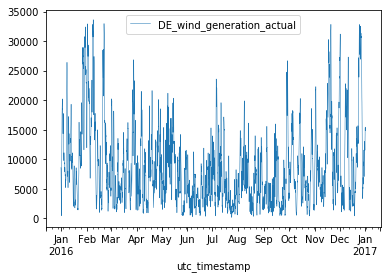

In [13]:
windgenerationdataformatted.plot(linewidth=0.5)

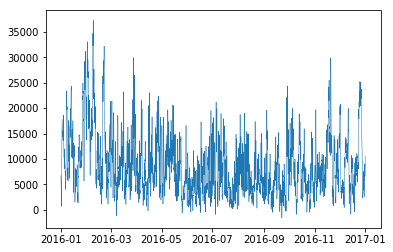

In [31]:
#I think this is an invalid test because using entire dataset in the predict but the training data is from that same set
plt.plot(timeseries,predicted, linewidth=0.5)

In [ ]:
'''
Todo:
take in weather data and generation data
separate data into two sets:
Solar
X = [sun related weather columns] 
Y = wind_generation_actual
Wind:
X = [wind related weather columns] 
Y = sun_generation_actual

Trim data based on timestamp
Wind generation begins at 2010-01-01
However there are values with NaN. Chose to only take 2016 for now
No wind data past 2016

Solar generation begins at 2012-01-01

To try: if there are timestamps do I have to format data?
'''

In [10]:
model = LinearRegression().fit(windspeedformatted,windgenerationdataformatted)

In [11]:
#using the previously formatted data which is data from 2015
prediction = model.predict(windspeedtest)

In [12]:
timeseries = pd.date_range('2015-01-01', '2015-12-31 23:00:00', freq='H')

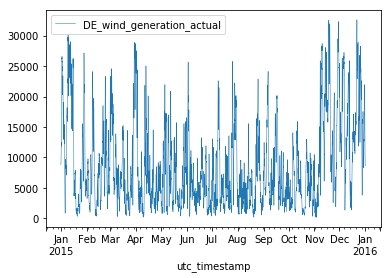

In [13]:
windgenerationtest.plot(linewidth=0.5)

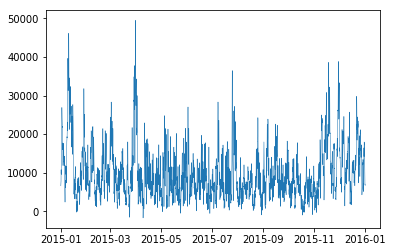

In [14]:
plt.plot(timeseries,prediction, linewidth=0.5)

In [15]:
from sklearn.metrics import r2_score
print(r2_score(windgenerationtest, prediction))

0.739395989624721


In [16]:
#large number because we're deadling with large numbers
from sklearn.metrics import mean_squared_error
print(mean_squared_error(windgenerationtest, prediction))

13351482.541491041


In [17]:
print(np.sum((windgenerationtest-prediction)**2)/(prediction.shape[0]))

DE_wind_generation_actual    1.335148e+07
dtype: float64
